## A first example running SMURFF

In this notebook we will run the BPMF algorithm using SMURFF, 
on compound-activity data.

### Downloading the data files

In these examples we use ChEMBL dataset for compound-proteins activities (IC50). The IC50 values and ECFP fingerprints can be downloaded using this smurff function:

In [1]:
import smurff

ic50_train, ic50_test, ecfp = smurff.load_chembl()

The resulting variables are all `scipy.sparse` matrices: `ic50` is
a sparse matrix containing interactions between chemical compounds (in the rows)
and protein targets (called essays - in the columns). The matrix is already split in 
as train and test set.

The `ecfp` contains compound features. These features will not be used in this example.

### Having a look at the data

The `spy` function in `matplotlib` is a handy function to plot sparsity pattern of a matrix.

<IPython.core.display.Javascript object>


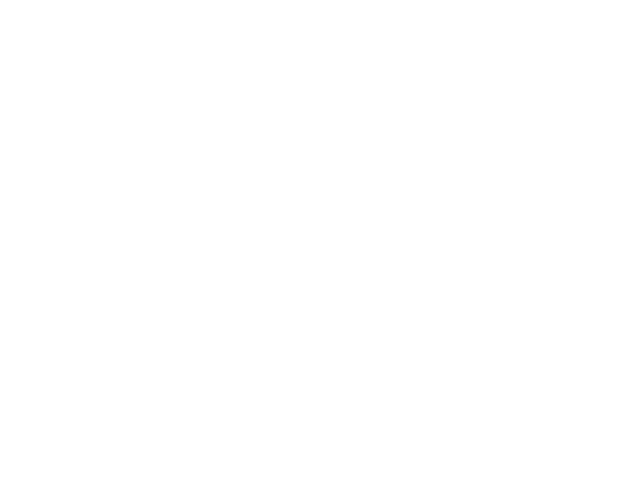

In [2]:
%matplotlib inline

from matplotlib.pyplot import figure, show

fig = figure()
ax = fig.add_subplot(111)
ax.spy(ic50_train.tocsr()[0:1000,:].T, markersize = 1)
show()

### Running SMURFF

Finally we run make a BPMF training session and call `run`. The `run` function builds the model and
returns the `predictions` of the test data.

In [3]:
session = smurff.BPMFSession(
                       Ytrain     = ic50_train,
                       Ytest      = ic50_test,
                       num_latent = 16,
                       burnin     = 40,
                       nsamples   = 200,
                       verbose    = 1,)

predictions = session.run()

PythonSession {
  Data: {
    Type: ScarceMatrixData [with NAs]
    Component-wise mean: 6.35028
    Component-wise variance: 1.88114
    Noise: Fixed gaussian noise with precision: 5.00
    Size: 47424 [15073 x 346] (0.91%)
  }
  Model: {
    Num-latents: 16
  }
  Priors: {
    0: NormalPrior
    1: NormalPrior
  }
  Result: {
    Test data: 11856 [15073 x 346] (0.23%)
  }
  Version: v0.12.2-4-gbf1370c
  Iterations: 40 burnin + 200 samples
  Save model: never
}

Initial:   0/0 RMSE: nan (1samp: nan) U: [ 0: 0.00,1: 0.00 ] took 0.0s
 Burnin:   1/40 RMSE: nan (1samp: 6.71) U: [ 0: 155.18,1: 113.17 ] took 0.0s
 Burnin:   2/40 RMSE: nan (1samp: 4.20) U: [ 0: 300.69,1: 122.46 ] took 0.0s
 Burnin:   3/40 RMSE: nan (1samp: 4.07) U: [ 0: 381.13,1: 120.59 ] took 0.0s
 Burnin:   4/40 RMSE: nan (1samp: 4.13) U: [ 0: 429.18,1: 116.18 ] took 0.0s
 Burnin:   5/40 RMSE: nan (1samp: 3.99) U: [ 0: 454.98,1: 109.48 ] took 0.0s
 Burnin:   6/40 RMSE: nan (1samp: 3.90) U: [ 0: 470.66,1: 105.34 ] took 0.0s

 Sample:  66/200 RMSE: 0.91 (1samp: 1.18) U: [ 0: 505.16,1: 47.44 ] took 0.0s
 Sample:  67/200 RMSE: 0.91 (1samp: 1.18) U: [ 0: 505.12,1: 47.54 ] took 0.0s
 Sample:  68/200 RMSE: 0.91 (1samp: 1.19) U: [ 0: 504.99,1: 47.50 ] took 0.0s
 Sample:  69/200 RMSE: 0.91 (1samp: 1.18) U: [ 0: 503.71,1: 47.37 ] took 0.0s
 Sample:  70/200 RMSE: 0.91 (1samp: 1.18) U: [ 0: 503.40,1: 47.69 ] took 0.0s
 Sample:  71/200 RMSE: 0.91 (1samp: 1.20) U: [ 0: 502.55,1: 47.38 ] took 0.0s
 Sample:  72/200 RMSE: 0.91 (1samp: 1.19) U: [ 0: 503.33,1: 47.44 ] took 0.0s
 Sample:  73/200 RMSE: 0.91 (1samp: 1.19) U: [ 0: 503.10,1: 47.19 ] took 0.0s
 Sample:  74/200 RMSE: 0.91 (1samp: 1.19) U: [ 0: 504.17,1: 47.24 ] took 0.0s
 Sample:  75/200 RMSE: 0.91 (1samp: 1.18) U: [ 0: 504.03,1: 47.27 ] took 0.0s
 Sample:  76/200 RMSE: 0.91 (1samp: 1.19) U: [ 0: 504.42,1: 47.33 ] took 0.0s
 Sample:  77/200 RMSE: 0.91 (1samp: 1.18) U: [ 0: 504.14,1: 47.39 ] took 0.0s
 Sample:  78/200 RMSE: 0.91 (1samp: 1.18) U: [ 0: 503.56,1: 47.6

 Sample: 174/200 RMSE: 0.90 (1samp: 1.20) U: [ 0: 505.08,1: 47.53 ] took 0.0s
 Sample: 175/200 RMSE: 0.90 (1samp: 1.19) U: [ 0: 504.84,1: 47.64 ] took 0.0s
 Sample: 176/200 RMSE: 0.90 (1samp: 1.18) U: [ 0: 503.29,1: 47.65 ] took 0.0s
 Sample: 177/200 RMSE: 0.90 (1samp: 1.20) U: [ 0: 504.58,1: 47.73 ] took 0.0s
 Sample: 178/200 RMSE: 0.90 (1samp: 1.20) U: [ 0: 502.81,1: 47.57 ] took 0.0s
 Sample: 179/200 RMSE: 0.90 (1samp: 1.19) U: [ 0: 501.83,1: 48.11 ] took 0.0s
 Sample: 180/200 RMSE: 0.90 (1samp: 1.19) U: [ 0: 502.30,1: 47.89 ] took 0.0s
 Sample: 181/200 RMSE: 0.90 (1samp: 1.18) U: [ 0: 502.77,1: 47.73 ] took 0.0s
 Sample: 182/200 RMSE: 0.90 (1samp: 1.20) U: [ 0: 502.49,1: 48.09 ] took 0.0s
 Sample: 183/200 RMSE: 0.90 (1samp: 1.19) U: [ 0: 503.64,1: 47.98 ] took 0.0s
 Sample: 184/200 RMSE: 0.90 (1samp: 1.19) U: [ 0: 503.77,1: 47.74 ] took 0.0s
 Sample: 185/200 RMSE: 0.90 (1samp: 1.19) U: [ 0: 502.90,1: 47.75 ] took 0.0s
 Sample: 186/200 RMSE: 0.90 (1samp: 1.19) U: [ 0: 502.94,1: 47.7

We can use the `calc_rmse` function to calculate the RMSE.

In [4]:
rmse = smurff.calc_rmse(predictions)
rmse

0.9016088255698349

### Plotting predictions versus actual values
Next to RMSE, we can also plot the predicted versus the actual values, to see how well the model performs.

In [5]:
%matplotlib notebook

import numpy
from matplotlib.pyplot import subplots, show

y = numpy.array([ p.val for p in predictions ])
predicted = numpy.array([ p.pred_avg for p in predictions ])

fig, ax = subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
show()

<IPython.core.display.Javascript object>

### Some more predictions



In [6]:
predictor = session.makePredictSession()

RuntimeError: line: 82 file: /Users/vanderaa/excape/smurff/lib/smurff-cpp/SmurffCpp/cmake/../../SmurffCpp/Sessions/Session.h function: getRootFile
assert: No root file found. Did you save any models?